# 01 Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# to display all columns in a dataframe in notebook
pd.pandas.set_option('display.max.columns', None)

In [3]:
df = pd.read_csv("../data/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


After a first look into the data, we can drop the ID column, since it is just a number for identify each house

In [4]:
df.drop("Id", axis=1, inplace=True)
df.shape

(1460, 80)

From the shape output we know we have 1460 houses (observations) and 800 columns in our data. Then we can see all the columns as one of them is the label: **SalePrice** and the other 79 variables are features. 

## Steps for feature Engineering
### 1 Look at the target variable: House price (SalePrice)

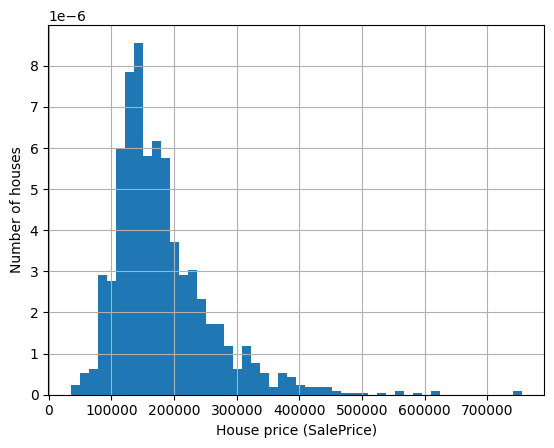

In [5]:
df["SalePrice"].hist(bins=50, density=True)
plt.ylabel("Number of houses")
plt.xlabel("House price (SalePrice)")
plt.show()

We found the distribution of the house price is numerical and right-skewed. We can use logarithmic transformation to transform the data into more bell-shape.

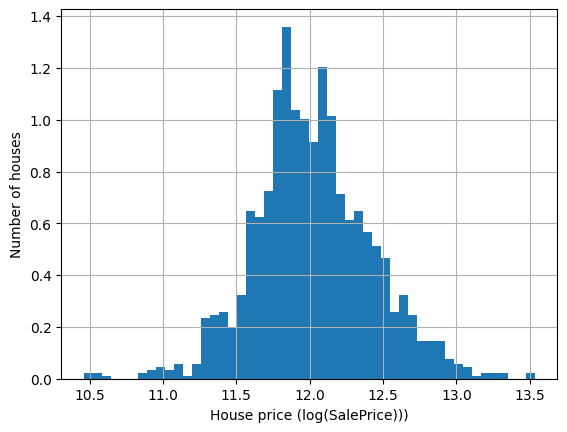

In [6]:
np.log(df['SalePrice']).hist(bins=50, density=True)
plt.ylabel("Number of houses")
plt.xlabel("House price (log(SalePrice)))")
plt.show()

### 2 Categorical and numerical variables
We first classify which columns are categorical and which columns are numerical.

In [7]:
unique_dtypes = df.dtypes.unique()
unique_dtypes # we can see we have three types of data type in our dataframe: Object(O), int64, float64

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [8]:
# for categorical variables
# create a list to hold categorical feature names
cat_vars = [var for var in df.columns if df[var].dtype=="O"]

# MSSubClass is also a categorical feature, although it is numerical data: you can see the data desription for more detail
cat_vars = cat_vars + ["MSSubClass"]

# Convert make sure all categorical data is set
df[cat_vars] = df[cat_vars].astype("O")

In [9]:
# for numerical variables
num_vars = [var for var in df.columns if var not in cat_vars and var != 'SalePrice']

### 3 Handling Missing values

In [10]:
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]
df[vars_with_na].isnull().mean().sort_values(ascending=False)*100

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

We can see some of the variable have really large proportion of missing values in it, especially the first three with over 90% of missing values, *PoolQC, MiscFeature, Alley*.

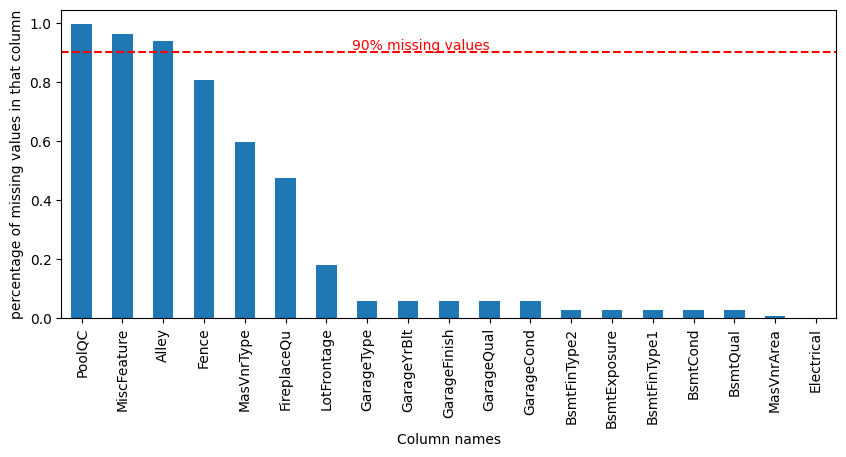

In [11]:
# plot the missing value percentage in barplot
df[vars_with_na].isnull().mean().sort_values(ascending=False).plot.bar(figsize=(10, 4))
plt.ylabel("percentage of missing values in that column")
plt.xlabel("Column names")
plt.axhline(y=0.9, color='r', linestyle="--")
plt.text(10, 0.9, "90% missing values", color='red', ha='right', va="bottom")
plt.show()

Let us see how many columns have NA values:

In [12]:
cat_na = [var for var in cat_vars if var in vars_with_na]
num_na = [var for var in num_vars if var in vars_with_na]
print(f"There are {len(cat_na)} categorical variables have NAs.")
print(f"There are {len(num_na)} numerical variables have NAs.")

There are 16 categorical variables have NAs.
There are 3 numerical variables have NAs.


We can use imputation technique to handle but let us first see their relationship with our target variable.

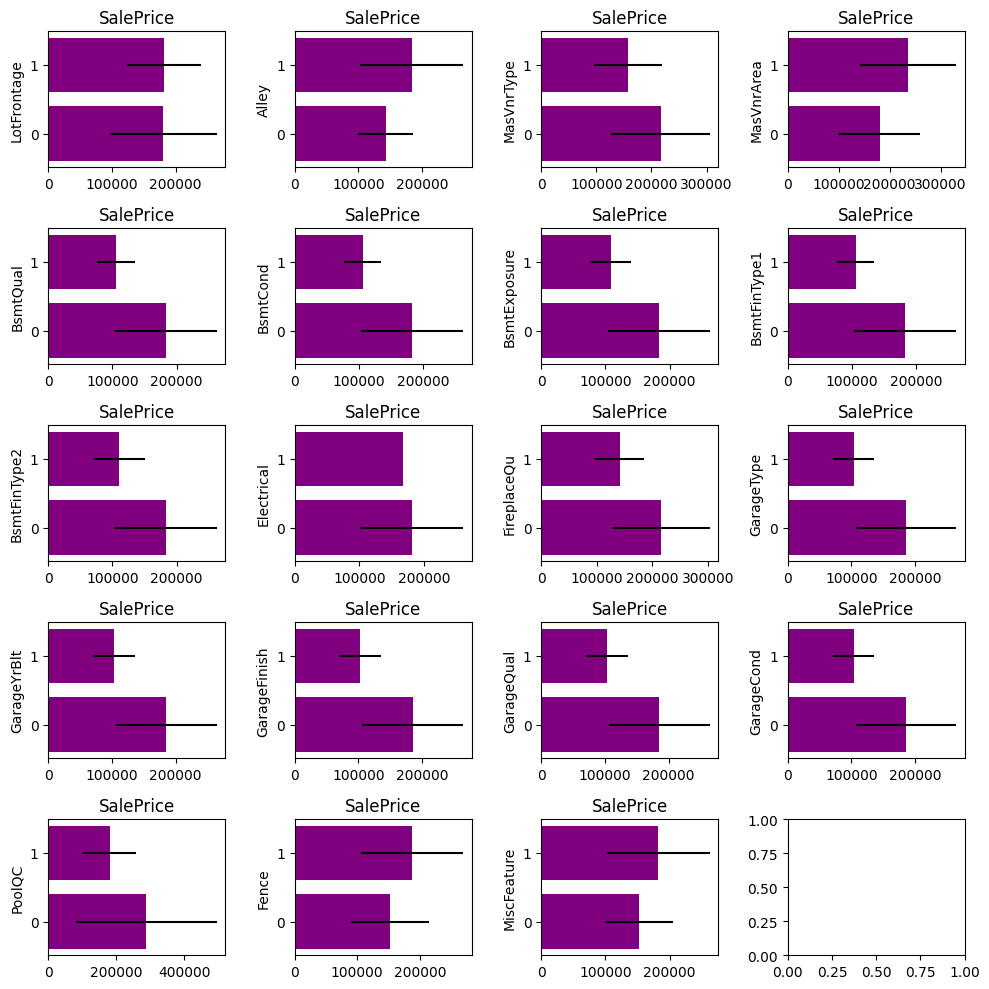

In [13]:
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(10, 10))

for i, var in enumerate(vars_with_na):

    row = i // 4
    col = i % 4

    df_copy = df.copy() # use pandas.copy() to copy the input dataframe and not overwrite the original one
    df_copy[var] = np.where(df_copy[var].isnull(), "1", "0") # set missing value as 1 and other as 0

    # Determine the median and standard deviation price in the groups 1 and 0
    tmp = df_copy.groupby(var)['SalePrice'].agg(['mean', 'std'])
    axs[row, col].barh(y=tmp.index, width=tmp['mean'], xerr=tmp['std'], color="purple")
    axs[row, col].set_title(f"SalePrice by {var}")
    axs[row, col].set_title("SalePrice")
    axs[row, col].set_ylabel(var)

plt.tight_layout()
plt.show()

From the above figure, we can observed some feature which include missing values has impact on the housing price. These features might be a good predictor of the Sale price.

### 4 Numerical variable

In [14]:
print(f"There are {len(num_vars)} numerical variables in the data.")
df[num_vars].head()

There are 35 numerical variables in the data.


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008


### 5 Temporal variables
There are 4 columns in the datasets that referring to time:
1. **YearBuilt**: year in which the house was built
2. **YearRemodAdd**: year in which the house was remodeled
3. **GarageYrBlt**: year in which a garage was built
4. **YrSold**: year in which the house was sold

Extract time information from temporal variables:

In [42]:
years_vars = [var for var in num_vars if 'Yr' in var or 'Year' in var]
years_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [17]:
for var in years_vars:
    print(var, df[var].unique(), df[var].dtype)
    print("---")

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905] int64
---
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974] int64
---
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965

We can find out that all the information are integer, and it represent in years.

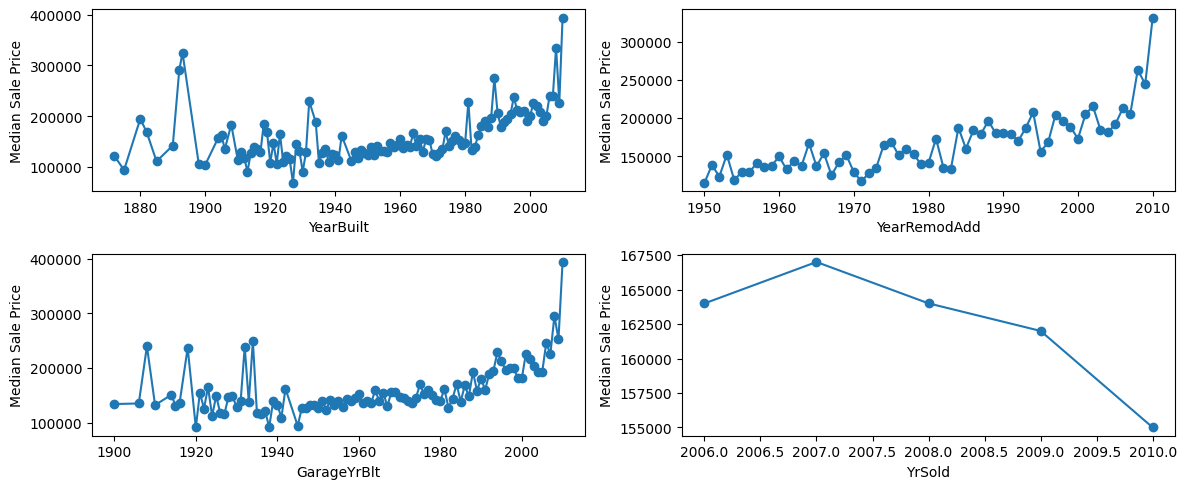

In [28]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 5))
for i, var in enumerate(years_vars):
    row = i // 2
    col = i % 2

    median_price = df.groupby(var)["SalePrice"].median()
    axs[row, col].plot(median_price.index, median_price.values, marker="o")
    axs[row, col].set_xlabel(var)
    axs[row, col].set_ylabel("Median Sale Price")
plt.tight_layout()
plt.show()

From the above results, we can find out: 
1. Comparing to the median sale price of the that year, **YearBult**, **GarageYrBlt**, and **YearRemodAdd** have similar pattern.
2. **YrSold** show 2007 has the highest price. However, usually houses get more expensive during time. Therefore, we can see a little more details in it.

An idea is to see the price related to how much time it takes to sold that house.

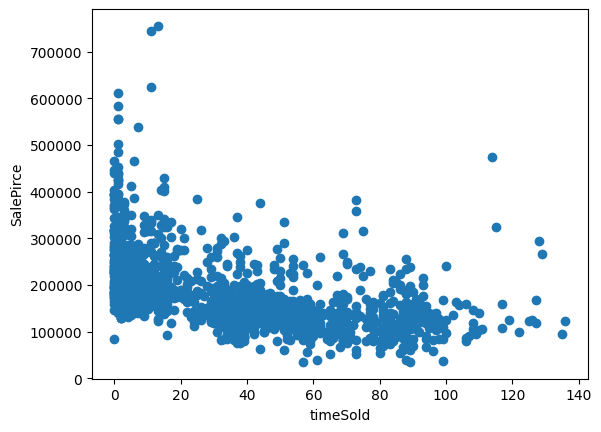

In [47]:
# create a new column timeSold: YrSold - YearBuilt and see the relationship with SalePrice.
df_tmp = df.copy()
df_tmp["timeSold"] = df_tmp["YrSold"] - df_tmp["YearBuilt"]
plt.scatter(df_tmp["timeSold"], df_tmp["SalePrice"])
plt.ylabel("SalePirce")
plt.xlabel("timeSold")
plt.show()

It looks like more newly built house has a higher price. However, there are some data points seems like outlier.
We next see how the other years variable relate to **YrSold**, why the median sale price drop from 2008 toward 2010?

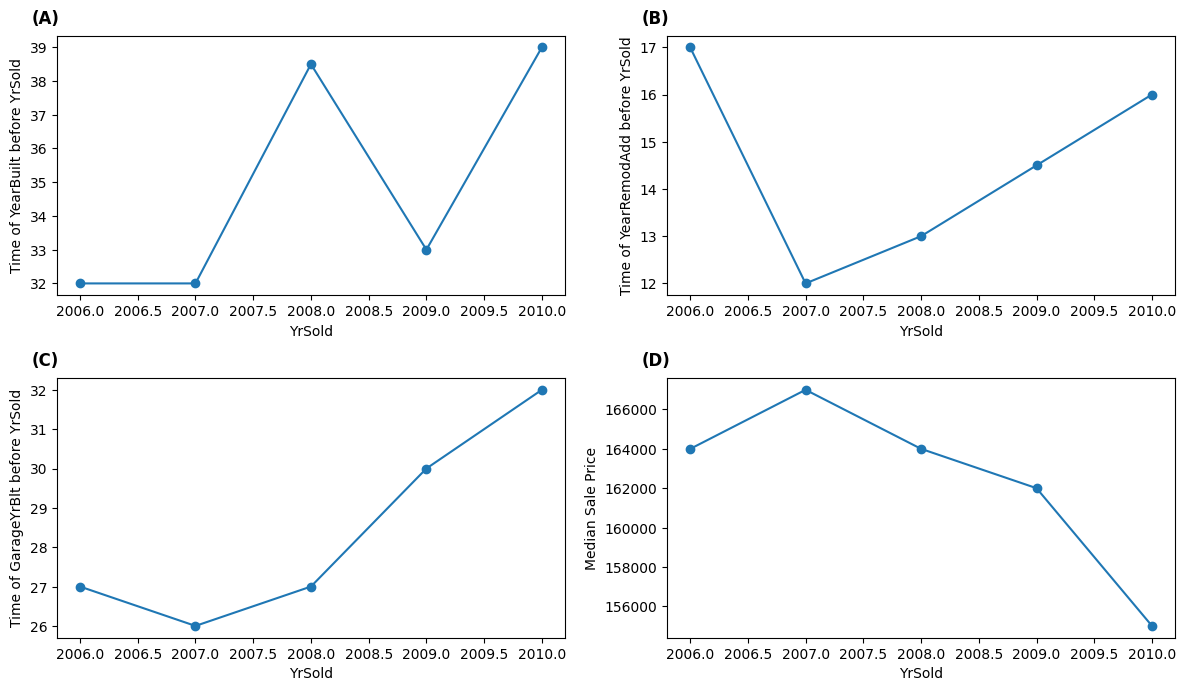

In [54]:
years_vars_noYrSold = [var for var in years_vars if var != "YrSold"]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 7))
for i, var in enumerate(years_vars_noYrSold):
    row = i // 2
    col = i % 2
    
    df_tmp = df.copy()
    df_tmp[var] = df_tmp["YrSold"] - df_tmp[var]
    median_var = df_tmp.groupby("YrSold")[var].median()
    axs[row, col].plot(median_var.index, median_var.values, marker="o")
    axs[row, col].set_xlabel("YrSold")
    axs[row, col].set_ylabel(f"Time of {var} before YrSold")

median_price = df.groupby("YrSold")["SalePrice"].median()
axs[1, 1].plot(median_price.index, median_price.values, marker="o")
axs[1, 1].set_xlabel("YrSold")
axs[1, 1].set_ylabel("Median Sale Price")

# label figures
labels = ["A", "B", "C", "D"]
for i, ax in enumerate(axs.flatten()):
    ax.text(-0.05, 1.1, f"({labels[i]})", transform=ax.transAxes, fontsize=12, fontweight='bold', va='top', ha='left')

plt.tight_layout()
plt.show()



Great news! Comparing the opposite trend between figure (C) and (D). It seems starting from 2008, the houses sold have older garage, it might be explained there was a drop in median sale price.